In [1]:
import os
import mmap
import numpy as np
import cv2
import matplotlib.pyplot as pyplot
from IPython.display import clear_output, Image, display, HTML
import base64
import time

# mem reflect method

In [5]:
hardAddr = 0x18200000
frameSize = 640*480*3

dev2 = os.open("/dev/mem", os.O_SYNC | os.O_RDONLY)

mm = mmap.mmap(dev2, frameSize, mmap.MAP_SHARED, mmap.PROT_READ, offset=hardAddr)

In [6]:
def readMat(imgArray):
    imgArray = mm[0:frameSize]
    mat = np.fromstring(imgArray, np.uint8)
    return mat.reshape( 480, 640, 3)

def arrayShow(imageArray):
    ret, png = cv2.imencode('.png', imageArray)
    encoded = base64.b64encode(png)
    return Image(data=encoded.decode('ascii'))

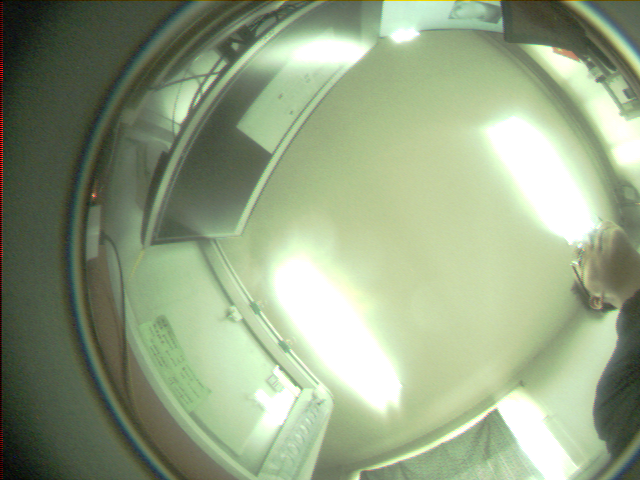

0.272855043411


In [ ]:
## imm = np.zeros([480,640,3])
while(True):
    start = time.time()
#     imgArray = mm[0:frameSize]
#     mat = np.fromstring(imgArray, np.uint8)
#     mat.reshape( 480, 640, 3)
    clear_output(wait=True)
    imgMat = readMat(mm)
    r = imgMat[:,:,0]
#     imm[:,:,0] = imgMat[:,:,1]
#     imm[:,:,1] = imgMat[:,:,0]
#     imm[:,:,2] = imgMat[:,:,2]
#     tempImg = cv2.resize(r, (160,120))
    img = arrayShow( imgMat)
    #显示图像
    display(img)
    end = time.time()
    print(end - start)
    time.sleep(0.1)

In [30]:
r = imgMat[:,:,0]

In [27]:
ret, binary = cv2.threshold(r, 150, 200, cv2.THRESH_BINARY)

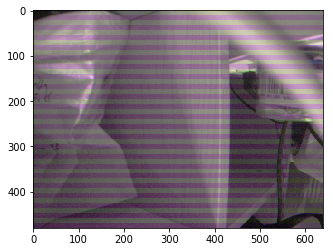

In [34]:
pyplot.imshow(imgMat)

In [31]:
mm.close()